# Titanic

<img src="Titanic.jpg">

Once Termed "Unsinkable" The RMS Titanic was a British Passanger Liner Which Sank on 15th April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.

Titanic was under the command of Capt. Edward Smith, who also went down with the ship. The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from Great Britain and Ireland, Scandinavia and elsewhere throughout Europe who were seeking a new life in the United States. The first-class accommodation was designed to be the pinnacle of comfort and luxury, with an on-board gymnasium, swimming pool, libraries, high-class restaurants and opulent cabins. A high-powered radiotelegraph transmitter was available for sending passenger "marconigrams" and for the ship's operational use.Although Titanic had advanced safety features such as watertight compartments and remotely activated watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board, and one third of her total capacity—due to outdated maritime safety regulations

Now We will analysie the Survival vs Death rate of the prople aboard the Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv("train.csv")
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
Data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Petterson, Mr. Johan Emil",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Let's Check for Null Values 

In [5]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here We see That we have a total of 177 Null values in the Age Column.

In [6]:
median_t=Data['Age'].median()
print(median_t)

28.0


Here, We see that the median for the complete Data is 28.0, Thus this would cause a spike in the data at the Data point for Age=28.0, To avoid that,<Br>
<hr color='black'>
Below, <Br>
We will now impute the Null Values for the age column with the median values for the people embarking with the same Port i.e. (S,Q,C)
where,
    C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
median_s=Data['Age'][Data['Embarked']=='S'].median()
Data['Age'][Data['Embarked']=='S']=Data['Age'][Data['Embarked']=='S'].fillna(median_s)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             87
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
median_q=Data['Age'][Data['Embarked']=='Q'].median()
Data['Age'][Data['Embarked']=='Q']=Data['Age'][Data['Embarked']=='Q'].fillna(median_q)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             38
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
median_c=Data['Age'][Data['Embarked']=='C'].median()
Data['Age'][Data['Embarked']=='C']=Data['Age'][Data['Embarked']=='C'].fillna(median_c)
Data.isnull().sum()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here,We will see the distribution plot for age of passangers

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


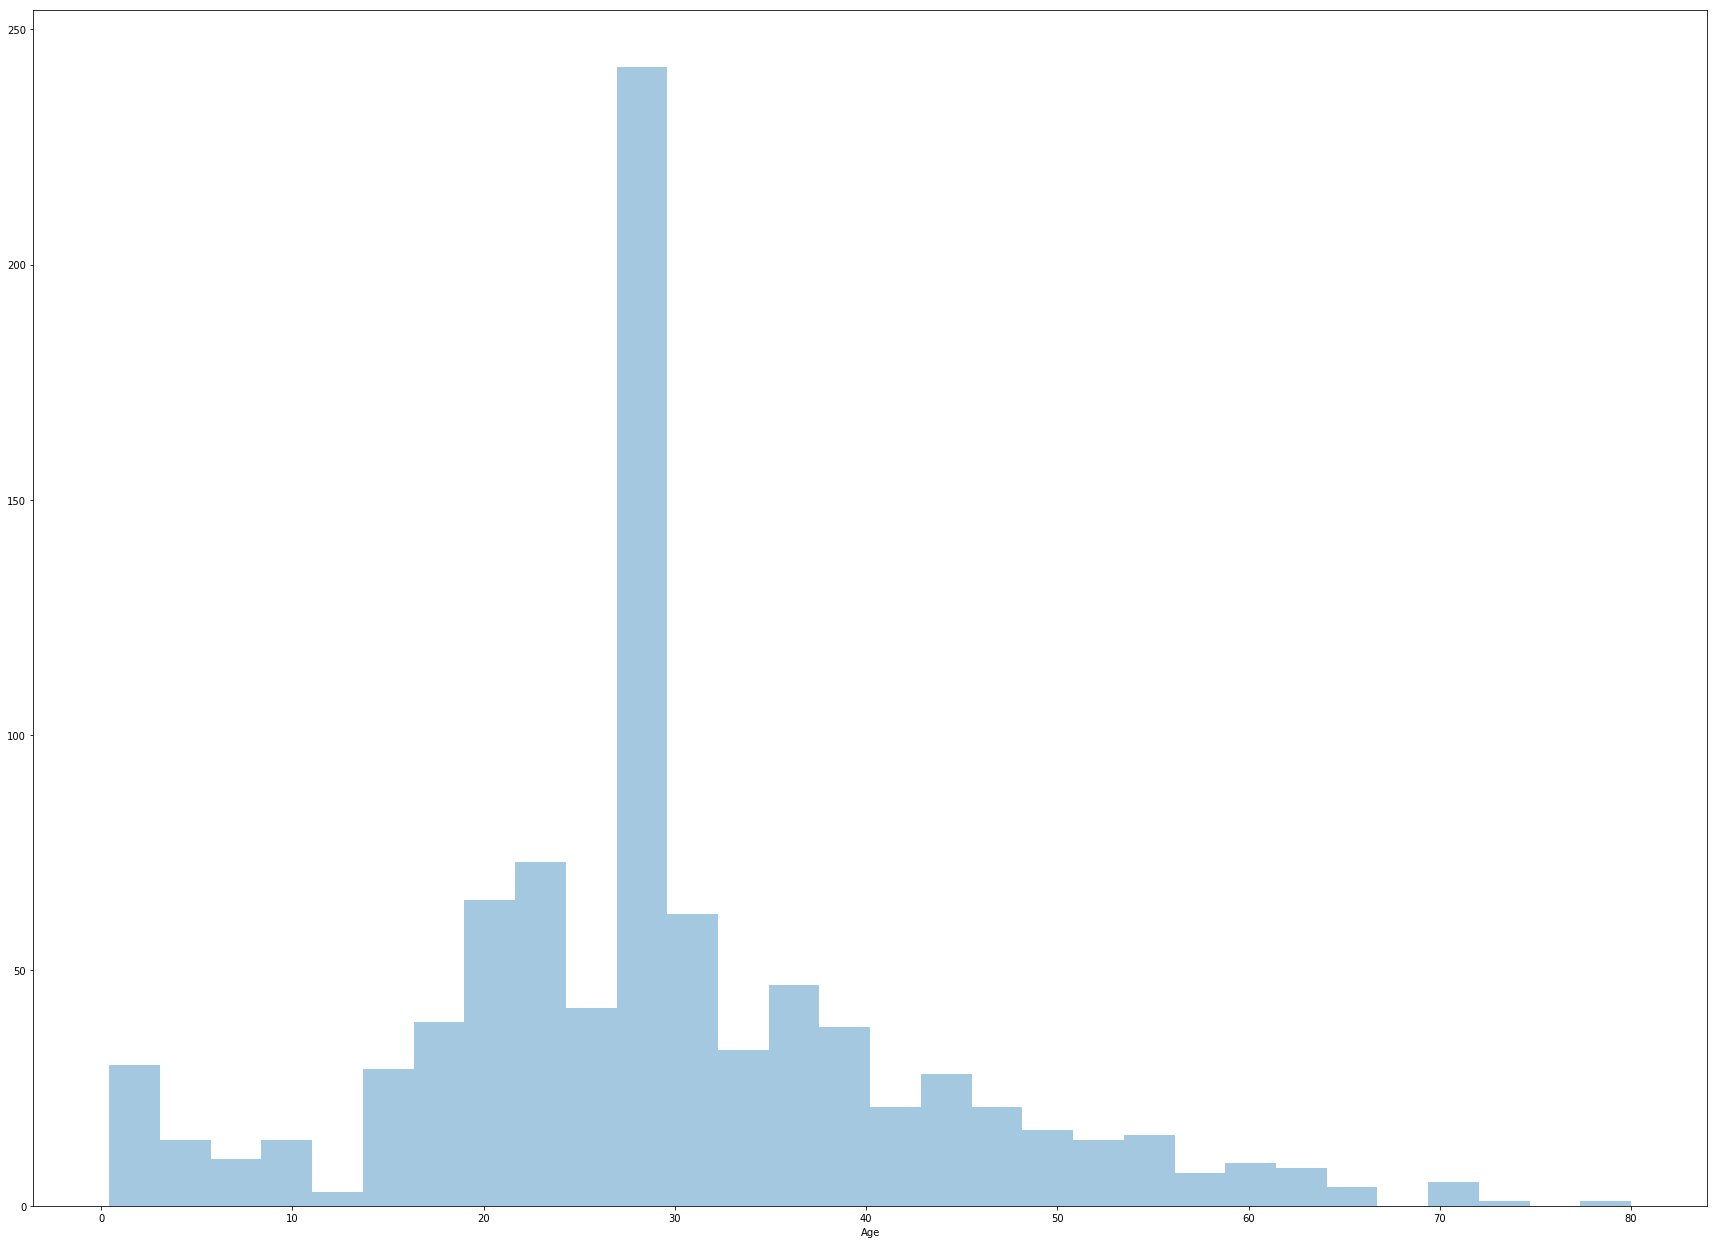

In [10]:
plt.figure(figsize=(30,22))
sns.distplot(Data['Age'],kde=False)
plt.show()

<h4>Here, We see that we don't have the Embarked Ports for 2 Rows. <br>
Hence, We Drop these rows.</h4>

In [11]:
Data=Data.dropna(how='any',subset=['Embarked'])
print(Data.isnull().sum())
Data.shape[0]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


889

<H4> Let's See if the the Ports People Embarked From any Affect on he Survival rate </H4>

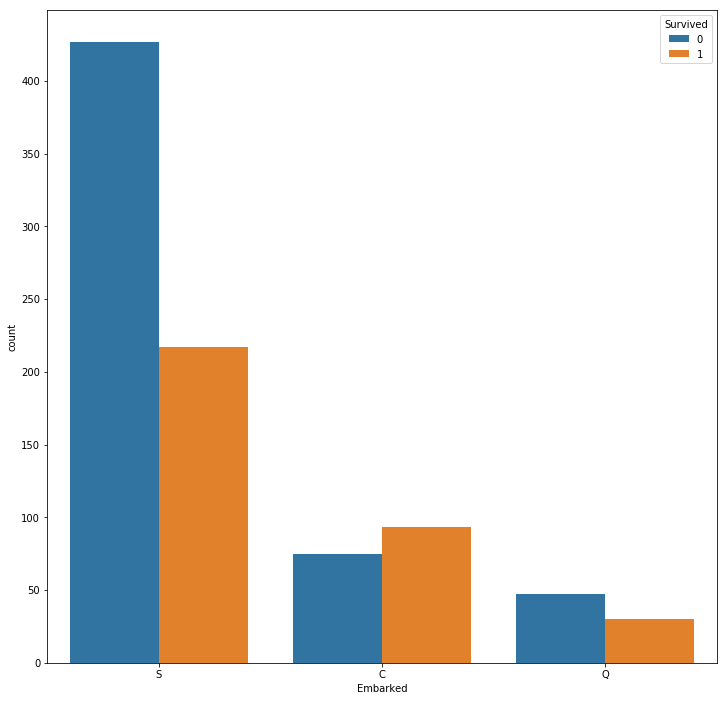

In [12]:
plt.figure(figsize=(12,12))
sns.countplot(data=Data,hue='Survived',x="Embarked")
plt.show()

<H4> Here, We See that the People Borading from the Port Of Cherboug had greater Chance of Survival for people boarding from the Same port. </H4>

In [13]:
print("The Rate of Survival for The Diffrent Ports")
print('S=',end=" ")
print(Data[Data['Survived']==1][Data['Embarked']=='S'].shape[0]/Data[Data['Embarked']=='S'].shape[0])
print('Q=',end=" ")
print(Data[Data['Survived']==1][Data['Embarked']=='Q'].shape[0]/Data[Data['Embarked']=='Q'].shape[0])
print('C=',end=" ")
print(Data[Data['Survived']==1][Data['Embarked']=='C'].shape[0]/Data[Data['Embarked']=='C'].shape[0])

The Rate of Survival for The Diffrent Ports
S= 0.33695652173913043
Q= 0.38961038961038963
C= 0.5535714285714286


c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<H3>Now, Let's See If the Sex of the people Affects the Survival Rate</H3>

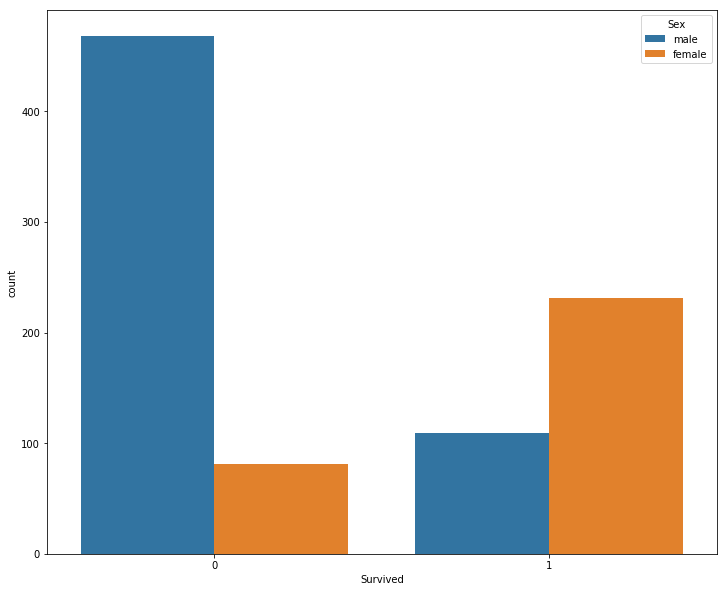

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(data=Data,x='Survived',hue='Sex')
plt.show()

Here We see that Females aboard the Titanic had a higher survival rate 

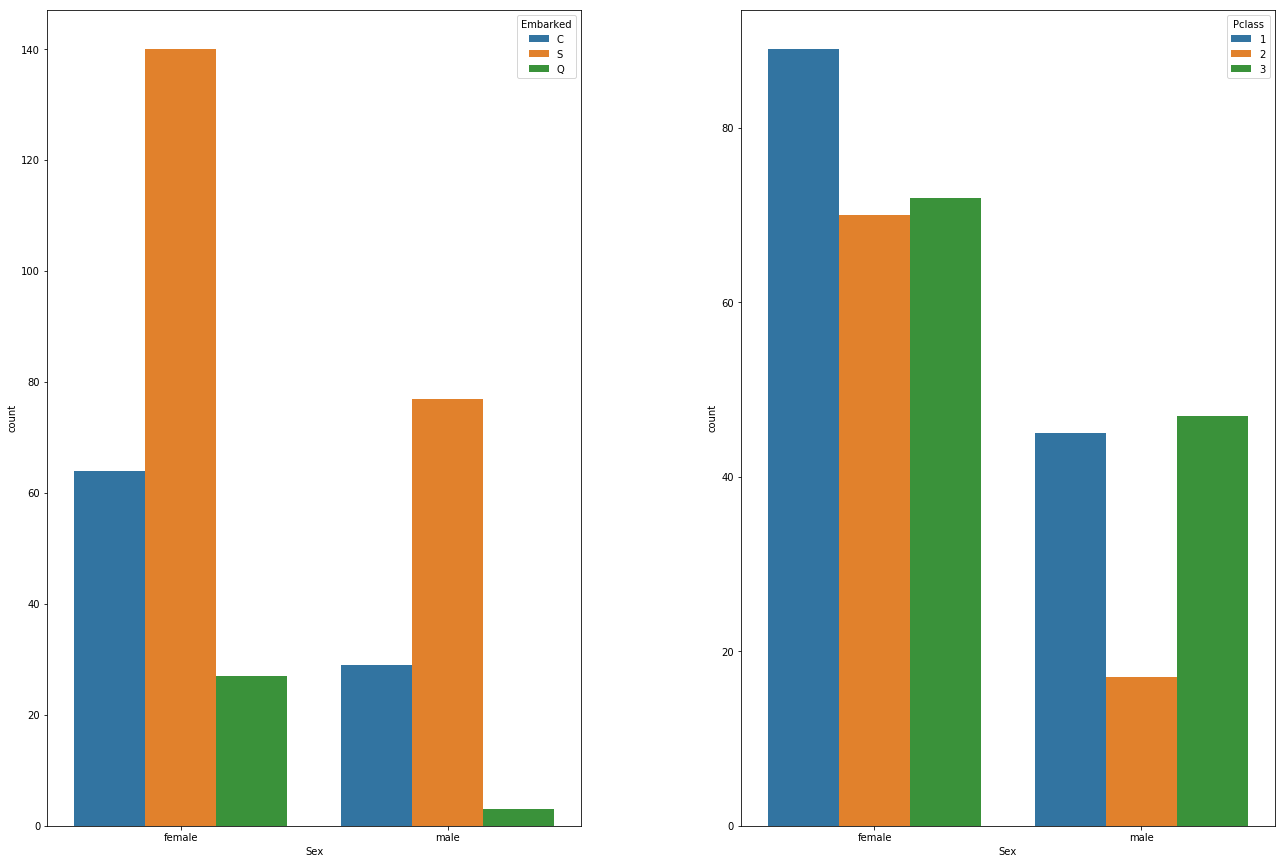

In [15]:
plt.figure(figsize=(22,15))
plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.subplot(121)
sns.countplot(x='Sex',data=Data[Data['Survived']==1],hue='Embarked')
plt.subplot(122)
sns.countplot(x='Sex',data=Data[Data['Survived']==1],hue='Pclass')
plt.show()

Here, From Fig 1. above, We See that Females Embarking from any Port had More Chances of Survival than Males <br>
Also,From Fig 2. above, We See that Females From every class of tickets had More Chances of Survival than Males.

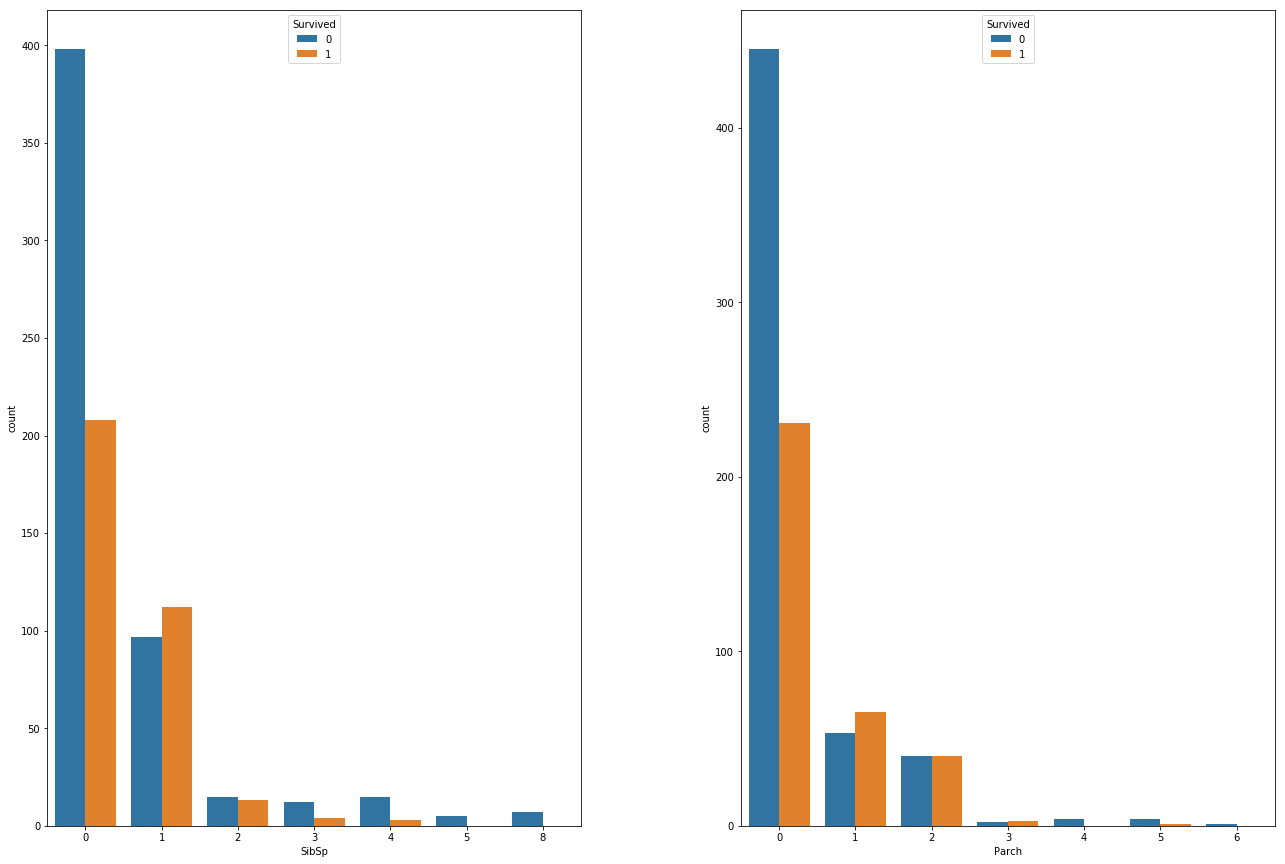

In [16]:
plt.figure(figsize=(22,15))
plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.subplot(121)
sns.countplot(hue='Survived',data=Data,x='SibSp')
plt.subplot(122)
sns.countplot(x='Parch',data=Data,hue='Survived')
plt.show()

<h3>From the above plots, we can conclude that :- <br>
<ul>
    <li>For People having 1 Siblings or Spouse on board, the Survival rate is Higher</li>
    <li>For People having 1 Parent or Children or 3 Children on board, The Survival Rate is Higher</li>
    </ul>
    </h3>

Let's Generate a Pairplot from the data

In [17]:
Data['Sex_Cleaned']=np.where(Data['Sex']=='male',1,0)
Data['Port_Cleaned']=np.where(Data['Embarked']=='S',1,np.where(Data['Embarked']=='Q',2,3))
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Cleaned,Port_Cleaned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


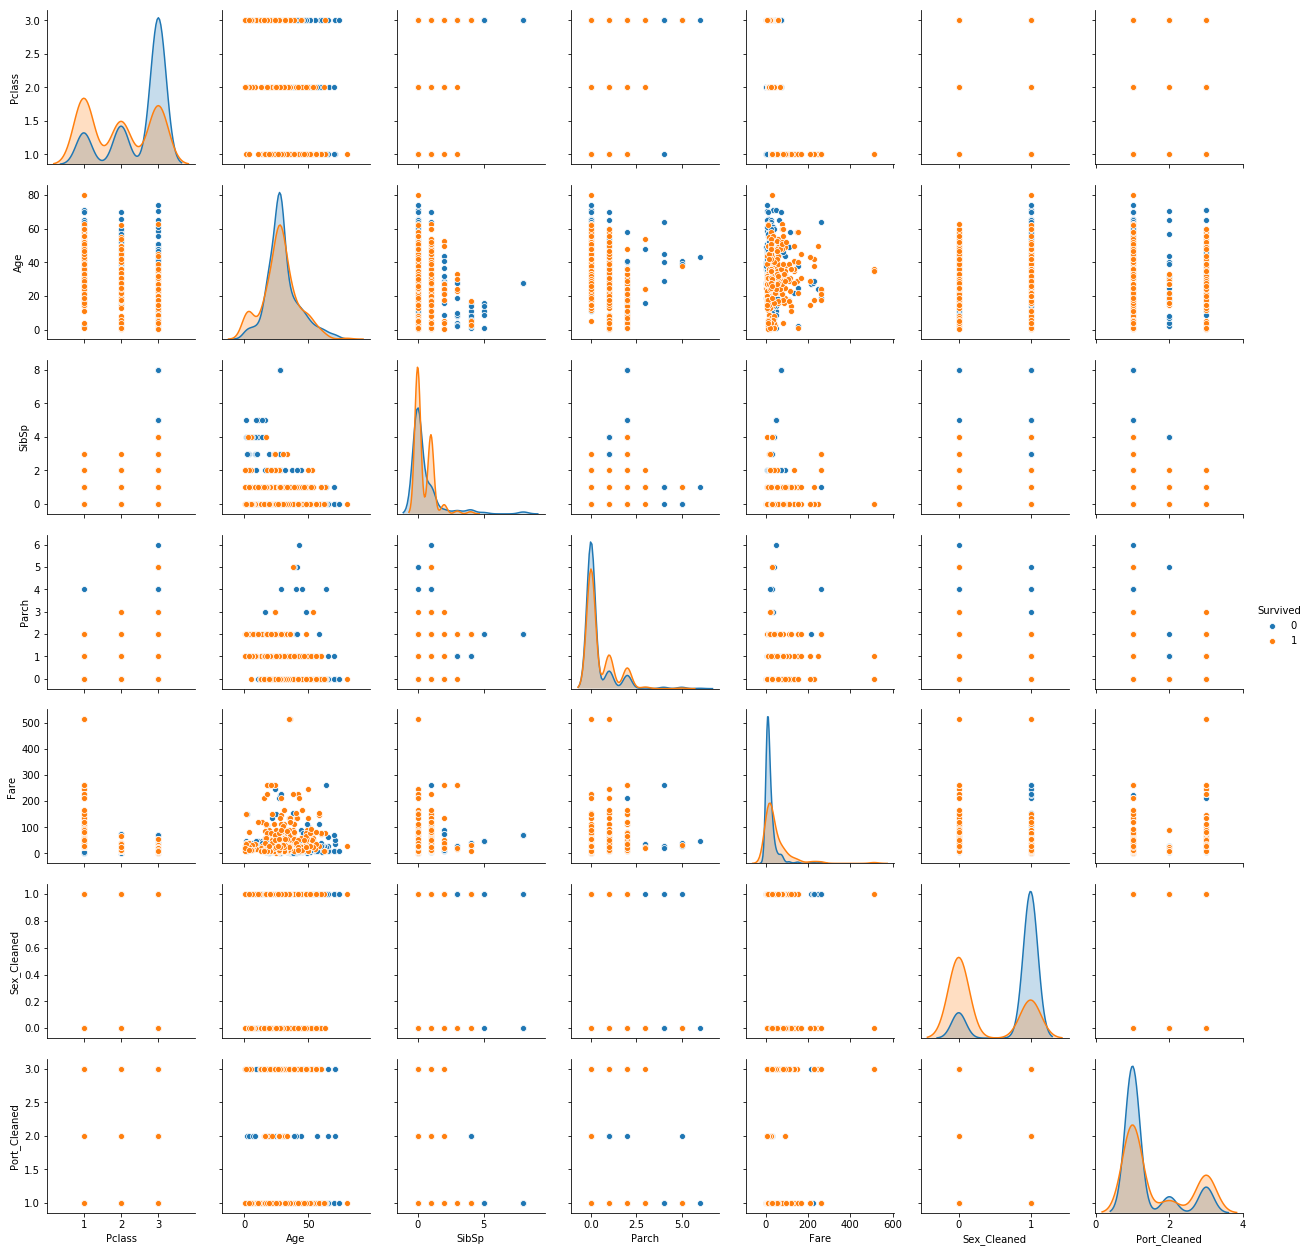

In [18]:
Col=['Pclass','Age','SibSp','Parch','Fare','Sex_Cleaned','Port_Cleaned']
sns.pairplot(data=Data,vars=Col,hue='Survived')
plt.show()

Let's see if any Variables are correlated in this Dataset

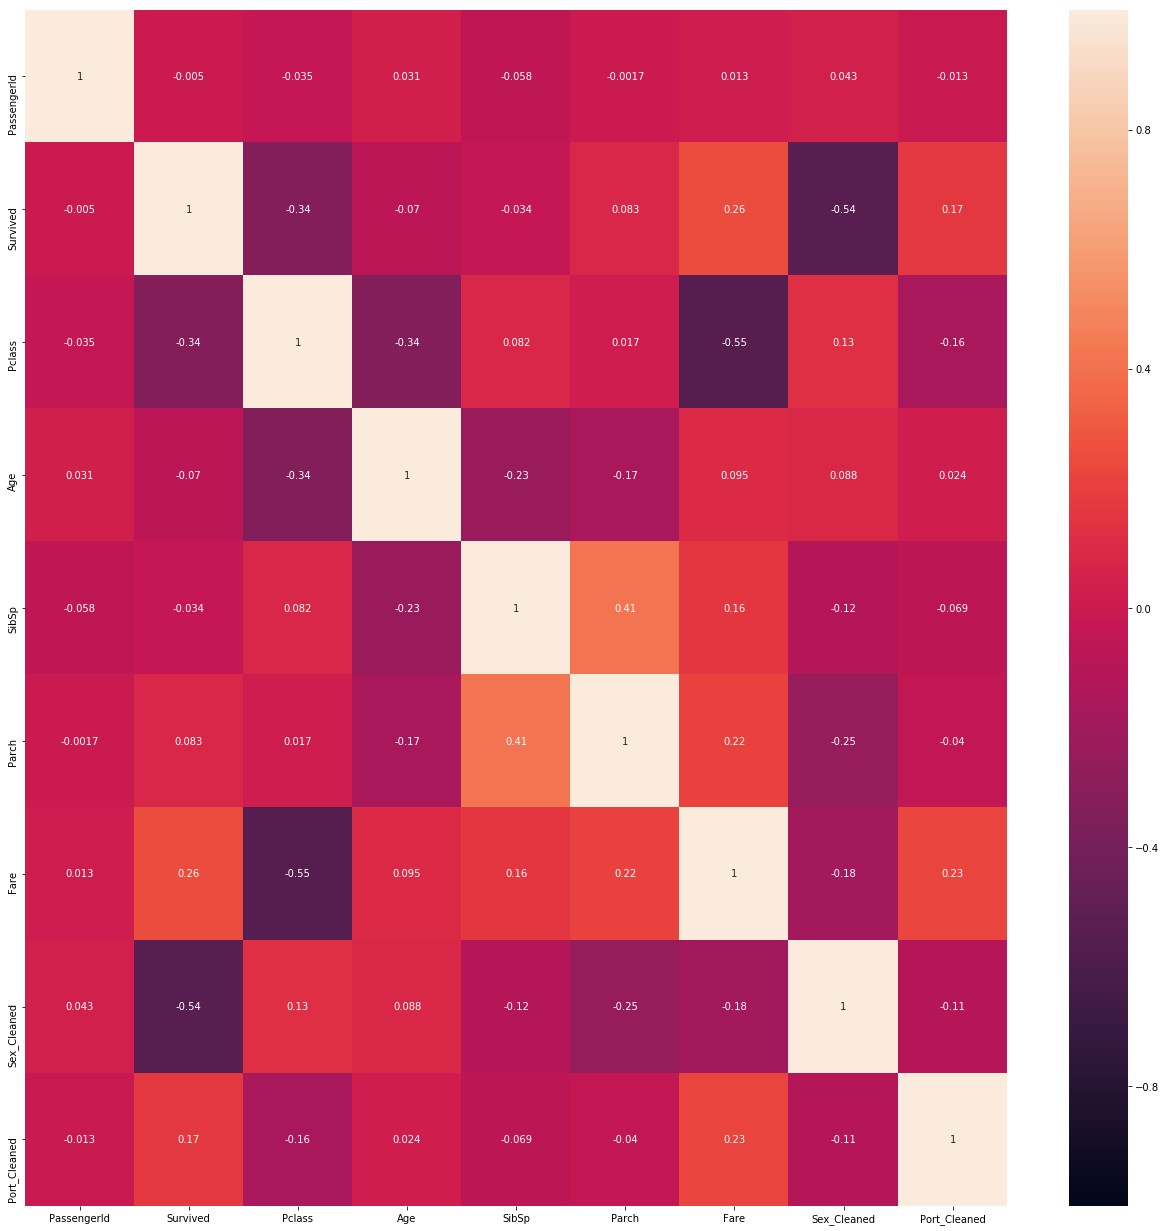

In [19]:
C=Data.corr()
plt.figure(figsize=(22,22))
sns.heatmap(C,annot=True,vmin=-1,vmax=1)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [49]:
Y=Data['Survived']
X=Data[Col]
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=0)

Let's Try to Make Predictions on The Model Using The K Nearest Neighbors Algorithm

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_Train,Y_Train)
Predict=knn.predict(X_Test)

mis=(Predict!=Y_Test).sum()
ln=X_Test.shape[0]
acc=1-(mis/ln)
Acc=acc*100
print("{} points mislabeled out of {} \nAccuracy {:05.2f} %".format(mis,ln,Acc))
print(roc_auc_score(Y_Test,Predict))

57 points mislabeled out of 178 
Accuracy 67.98 %
0.6638617090671886


With KNN,<br>
We Have, 67.98% Accuracy and 0.663 Auc Roc Score <br>
Now We will Try Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
Logr=LogisticRegression()
Logr.fit(X_Train,Y_Train)
Predict_Log=Logr.predict(X_Test)

mis=(Predict_Log!=Y_Test).sum()
ln=X_Test.shape[0]
acc=1-(mis/ln)
Acc=acc*100
print("{} points mislabeled out of {} \nAccuracy {:05.2f} %".format(mis,ln,Acc))
print(roc_auc_score(Y_Test,Predict_Log))

50 points mislabeled out of 178 
Accuracy 71.91 %
0.6992824527071103


With Logistic Regression,<br>we have 71.91% Accuracy and 0.699 Auc Roc Score
<br> We will Now Try Decision Trees

In [86]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

DT.fit(X_Train,Y_Train)
Predict_DT=DT.predict(X_Test)

mis=(Predict_DT!=Y_Test).sum()
ln=X_Test.shape[0]
acc=1-(mis/ln)
Acc=acc*100
print("{} points mislabeled out of {} \nAccuracy {:05.2f} %".format(mis,ln,Acc))
print(roc_auc_score(Y_Test,Predict_DT))

43 points mislabeled out of 178 
Accuracy 75.84 %
0.7451402478799739


With Decision Trees,<br>
We have 75.84% accuracy and 0.745 Auc roc score,
<br>
Now, we will use Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier(n_estimators=50)
Rfc.fit(X_Train,Y_Train)
Predict_RF=Rfc.predict(X_Test)

mis=(Predict_RF!=Y_Test).sum()
ln=X_Test.shape[0]
acc=1-(mis/ln)
Acc=acc*100
print("{} points mislabeled out of {} \nAccuracy {:05.2f} %".format(mis,ln,Acc))
print(roc_auc_score(Y_Test,Predict_RF))

36 points mislabeled out of 178 
Accuracy 79.78 %
0.7784735812133071


With Random Forest Classifier,<br>
We get 79.78% Accuracy and 0.778 Auc Roc Score